In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from matplotlib.lines import Line2D # for legend elements

In [3]:
MI_all = pd.read_csv("/Users/merieldoyle/Desktop/ckMI/data/condition.csv", index_col = False)
MI_all = pd.DataFrame(MI_all)
MI_all

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Difficulty Changing * Wrongness → Punishment

In [12]:
MI_all['wrong_med'] = MI_all.wrong > MI_all.wrong.median()
MI_all['wrong_med'] = np.where(MI_all.wrong_med == False, 'below median', 'above median')

In [13]:
MI_all['control_med'] = MI_all.control > MI_all.control.median()
MI_all['control_med'] = np.where(MI_all.control_med == False, 'below median', 'above median')

In [14]:
MI_all

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common,wrong_med,control_med
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,below median,above median
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
...,...,...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,above median,above median
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,below median,below median
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median


In [5]:
dcw_model = smf.ols(formula = 'punish ~ change + wrong', data = MI_all).fit()
dcw_summary = dcw_model.summary()
print(dcw_summary.tables[0], dcw_summary.tables[1])

model_interaction = smf.ols(formula = 'punish ~ change + wrong + change:wrong', data = MI_all).fit()
summary = model_interaction.summary()
print(summary.tables[0], summary.tables[1])

                            OLS Regression Results                            
Dep. Variable:                 punish   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     544.7
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          2.75e-214
Time:                        10:28:44   Log-Likelihood:                -7370.4
No. Observations:                4888   AIC:                         1.475e+04
Df Residuals:                    4885   BIC:                         1.477e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

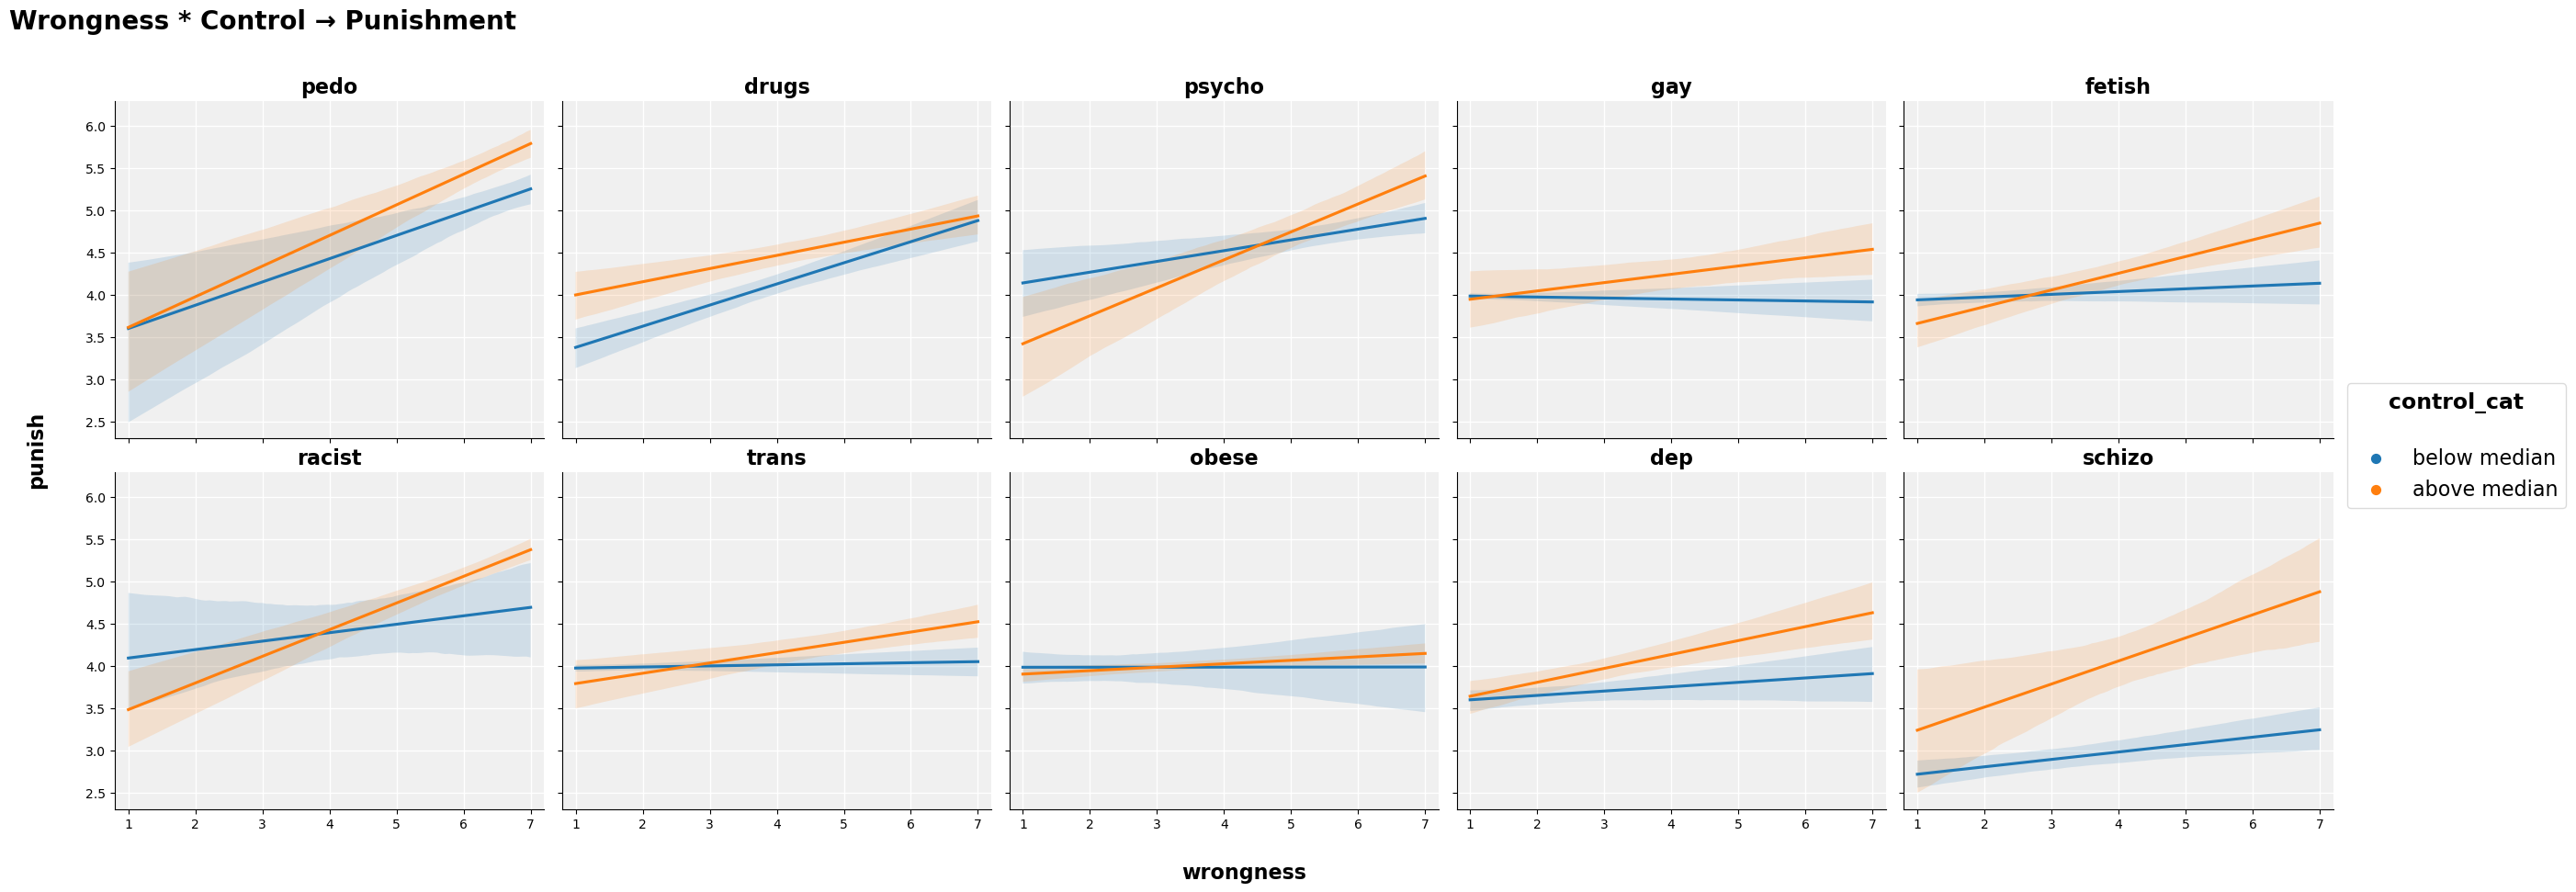

In [15]:
custom_titles = ['pedo', 'drugs', 'psycho', 'gay', 'fetish',
                 'racist', 'trans', 'obese', 'dep', 'schizo']

dcw = sns.lmplot(
    data = MI_all, 
    x = 'wrong', y = 'punish', 
    col = 'Condition', hue = 'control_med', col_wrap = 5,
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
dcw.set(ylim = (2.3, 6.3), xlim = (0.8, 7.2), ylabel = "", xlabel = "")

dcw.add_legend(legend_data = dcw._legend_data, 
              title = 'control_cat\n', # \n adds a space between title and elements
              prop = {'size': 16}, 
              edgecolor = 'lightgray', 
              frameon = True, fancybox = True) # legend title
dcw._legend.get_title().set_weight('bold')
dcw._legend.get_title().set_size('17')

for lh in dcw._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
for ax, title in zip(dcw.axes.flat, custom_titles):
    ax.set_title(title, fontsize = 16, fontweight = "bold")

dcw.fig.suptitle('Wrongness * Control → Punishment', x = 0.08, y = 0.93, size = 20, fontweight = "bold")
dcw.fig.subplots_adjust(top = .83, hspace = 0.1)

dcw.fig.text(0.47, -0.01, 'wrongness', ha='center', va='center', fontsize=16, fontweight='bold') # common x-label
dcw.fig.text(-0.01, 0.45, 'punish', ha='center', va='center', fontsize=16, fontweight='bold', rotation='vertical') # common y-label

for ax in dcw.axes.flat:
    ax.set_facecolor('#F0F0F0')  # set background color
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
    ax.set_axisbelow(True)  # put gridlines below bar plots

plt.show(dcw)

## Mental Illness * Control → Punishment

#### Across participants

In [4]:
MI_all['control_med'] = MI_all.control > MI_all.control.median()
MI_all['control_med'] = np.where(MI_all.control_med == False, 'below median', 'above median')
MI_all

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common,control_med
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,above median
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
...,...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,above median
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,below median
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median


In [207]:
mc_model = smf.ols(formula = 'punish ~ mental + control', data = MI_all).fit()
mc_summary = mc_model.summary()
print(mc_summary.tables[0], mc_summary.tables[1])

model_interaction = smf.ols(formula = 'punish ~ mental + control + mental:control', data = MI_all).fit()
summary = model_interaction.summary()
print(summary.tables[0], summary.tables[1])

                            OLS Regression Results                            
Dep. Variable:                 punish   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sat, 20 May 2023   Prob (F-statistic):          7.36e-107
Time:                        13:49:39   Log-Likelihood:                -7617.9
No. Observations:                4888   AIC:                         1.524e+04
Df Residuals:                    4885   BIC:                         1.526e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

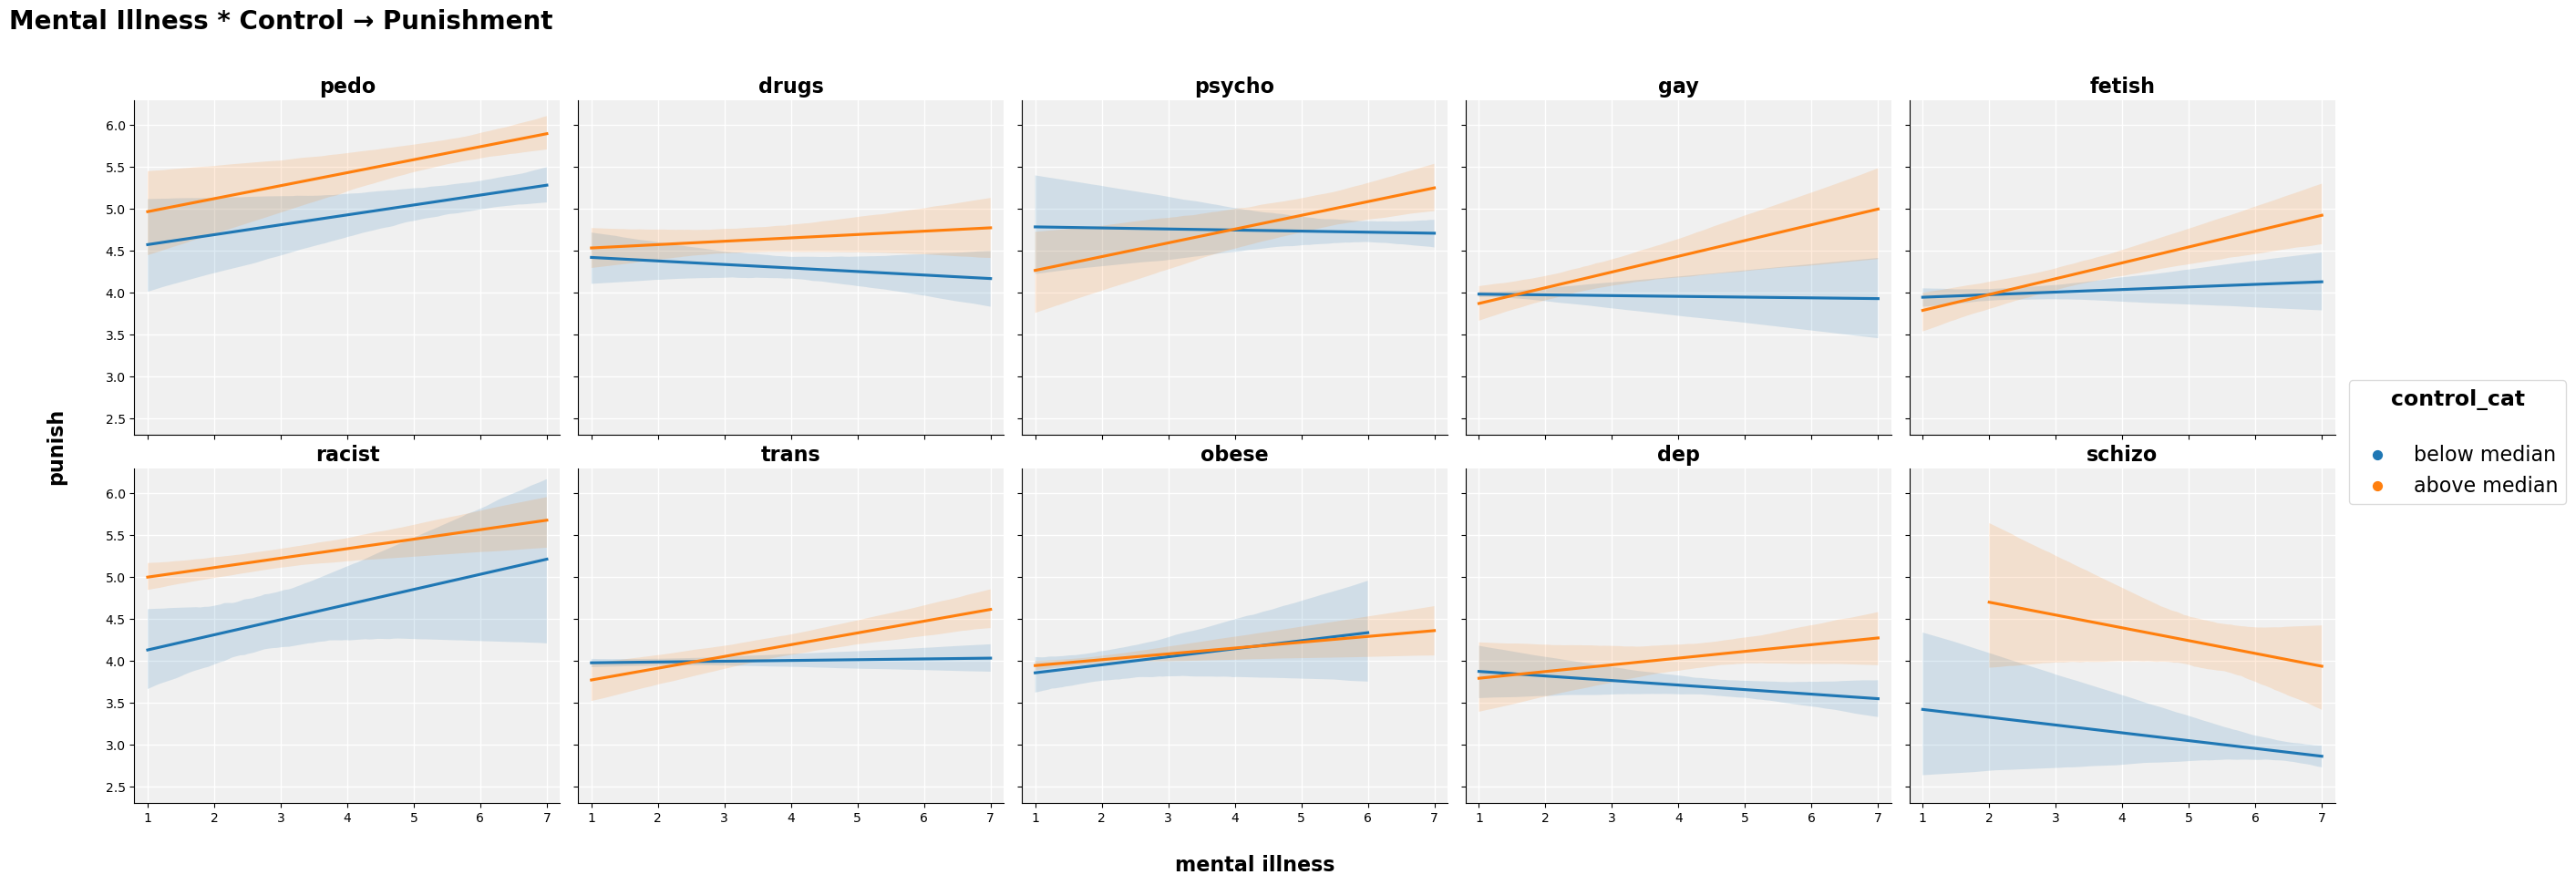

In [208]:
custom_titles = ['pedo', 'drugs', 'psycho', 'gay', 'fetish',
                 'racist', 'trans', 'obese', 'dep', 'schizo']

mc = sns.lmplot(
    data = MI_all, 
    x = 'mental', y = 'punish', 
    col = 'Condition', hue = 'control_med', col_wrap = 5,
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
mc.set(ylim = (2.3, 6.3), xlim = (0.8, 7.2), ylabel = "", xlabel = "")

mc.add_legend(legend_data = mc._legend_data, 
              title = 'control_cat\n', # \n adds a space between title and elements
              prop = {'size': 16}, 
              edgecolor = 'lightgray', 
              frameon = True, fancybox = True) # legend title
mc._legend.get_title().set_weight('bold')
mc._legend.get_title().set_size('17')

for lh in mc._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
for ax, title in zip(mc.axes.flat, custom_titles):
    ax.set_title(title, fontsize = 16, fontweight = "bold")

mc.fig.suptitle('Mental Illness * Control → Punishment', x = 0.08, y = 0.93, size = 20, fontweight = "bold")
mc.fig.subplots_adjust(top = .83, hspace = 0.1)

mc.fig.text(0.47, -0.01, 'mental illness', ha='center', va='center', fontsize=16, fontweight='bold') # common x-label
mc.fig.text(-0.01, 0.45, 'punish', ha='center', va='center', fontsize=16, fontweight='bold', rotation='vertical') # common y-label

for ax in mc.axes.flat:
    ax.set_facecolor('#F0F0F0')  # set background color
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
    ax.set_axisbelow(True)  # put gridlines below bar plots

plt.show(mc)

In [6]:
# save_directory = "/Users/merieldoyle/Desktop/ckMI/results/figures/moderations/"
# file_name = "mental-control-punish.png"
# save_path = save_directory + file_name

# mc.savefig(save_path, dpi=300)

### Across conditions

In [209]:
above_median_count = MI_all[MI_all['control_med'] == 'above median'].groupby('Condition')['control_med'].count()
above_median_count = above_median_count.sort_values(ascending=False)

top_5_conditions = above_median_count.head(5).index
bottom_5_conditions = above_median_count.tail(5).index

mean_df = MI_all.groupby('Condition')[['mental', 'wrong', 'punish']].mean().reset_index()

mean_df['control_med'] = mean_df['Condition'].apply(lambda x: 'above median' if x in top_5_conditions else 'below median')

mean_df

,Condition,mental,wrong,punish,control_med
0,dep,4.563410,2.831601,3.821206,below median
1,drugs,3.674274,4.852697,4.454357,above median
2,fetish,3.250696,3.462396,4.130919,below median
3,gay,1.859213,2.356108,4.045549,below median
4,obese,2.165884,3.809077,4.018779,above median
5,pedo,5.618257,6.603734,5.408714,above median
6,psycho,5.877847,5.565217,4.784679,below median
7,racist,2.578189,6.236626,5.115226,above median
8,schizo,6.363825,3.343035,3.118503,below median
9,trans,2.951172,2.894531,4.078125,above median


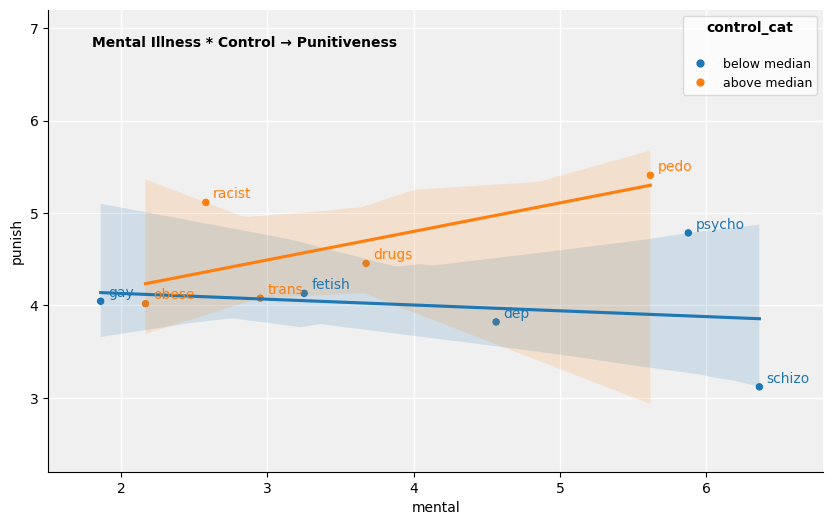

In [210]:
color_dict = {'below median': '#1f77b4', 'above median': '#ff7f0e'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label='below median',
                          markerfacecolor='#1f77b4', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='above median',
                          markerfacecolor='#ff7f0e', markersize=7)]

plt.figure(figsize=(10, 6))

mc_all = sns.scatterplot(
    data=mean_df,
    x='mental',
    y='punish',
    hue='control_med',
    alpha=1,
    legend=False
)

mc_all.axes.set_facecolor('#F0F0F0')
mc_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
mc_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
mc_all.axes.set_axisbelow(True)

mc_all.spines['top'].set_visible(False)
mc_all.spines['right'].set_visible(False)

hue_categories = mean_df['control_med'].unique()

for hue_category in hue_categories:
    data_subset = mean_df[mean_df['control_med'] == hue_category]
    sns.regplot(
        data=data_subset,
        x='mental',
        y='punish',
        scatter=False,
        ci=95
    )
    
for index, row in mean_df.iterrows():
    plt.text(
        row['mental'] + 0.05,
        row['punish'] + 0.05,
        row['Condition'],
        color=color_dict[row['control_med']],
        fontsize=10,
    )

plt.xlim(1.5, 6.8)
plt.ylim(2.2, 7.2)

plt.text(1.8, 6.8, 'Mental Illness * Control → Punitiveness', fontsize=10, fontweight = "bold")

legend = plt.legend(handles=legend_elements, 
                    title='control_cat\n', title_fontsize=10, 
                    edgecolor='lightgray', prop = {'size': 9}, 
                    fancybox=True)

legend.get_title().set_weight('bold')

save_directory = "/Users/merieldoyle/Desktop/ckMI/results/figures/moderations/"
file_name = "mental-control-punish-ALL.png"
save_path = save_directory + file_name

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()

### Mental Illness * Wrongness → Punishment

In [7]:
MI_all['wrong_med'] = MI_all.wrong > MI_all.wrong.median()
MI_all['wrong_med'] = np.where(MI_all.wrong_med == False, 'below median', 'above median')

In [8]:
MI_all

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common,control_med,wrong_med
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,above median,below median
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
...,...,...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,above median,above median
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,below median,below median
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median


In [9]:
mw_model = smf.ols(formula = 'punish ~ mental + wrong', data = MI_all).fit()
mw_summary = mw_model.summary()
print(mw_summary.tables[0], mw_summary.tables[1])

model_interaction = smf.ols(formula = 'punish ~ mental + wrong + mental:wrong', data = MI_all).fit()
summary = model_interaction.summary()
print(summary.tables[0], summary.tables[1])

                            OLS Regression Results                            
Dep. Variable:                 punish   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     565.4
Date:                Tue, 08 Aug 2023   Prob (F-statistic):          1.35e-221
Time:                        10:30:29   Log-Likelihood:                -7353.6
No. Observations:                4888   AIC:                         1.471e+04
Df Residuals:                    4885   BIC:                         1.473e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

/Users/merieldoyle/opt/anaconda3/envs/ckMIconda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/q7/0p1jf63j7lx6ldgn2kdfqlz00000gn/T/ipykernel_95306/3067658594.py:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in mw._legend.legendHandles:


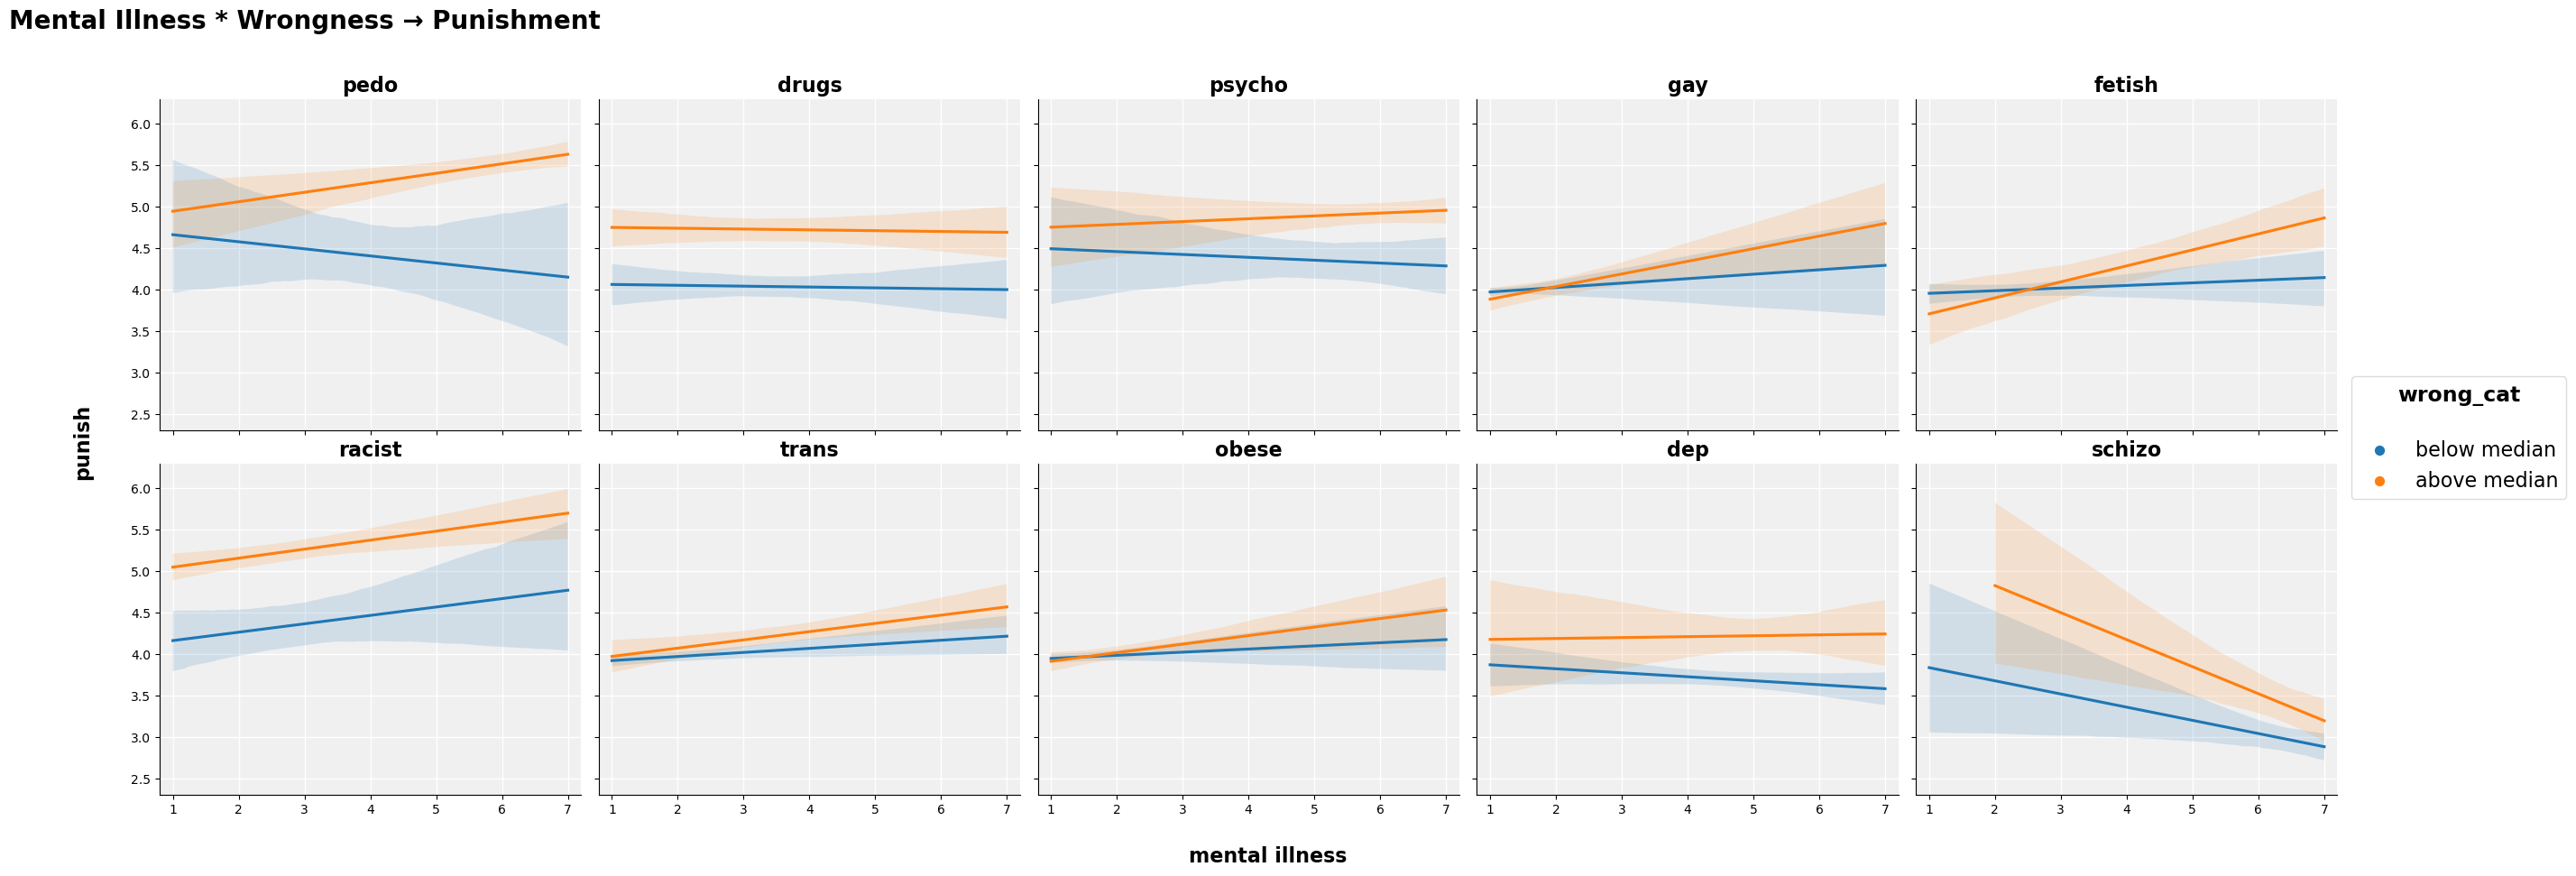

In [10]:
custom_titles = ['pedo', 'drugs', 'psycho', 'gay', 'fetish',
                 'racist', 'trans', 'obese', 'dep', 'schizo']

mw = sns.lmplot(
    data = MI_all, 
    x = 'mental', y = 'punish', 
    col = 'Condition', hue = 'wrong_med', col_wrap = 5,
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
mw.set(ylim = (2.3, 6.3), xlim = (0.8, 7.2), ylabel = "", xlabel = "")

mw.add_legend(legend_data = mw._legend_data, 
              title = 'wrong_cat\n', # \n adds a space between title and elements
              prop = {'size': 16}, 
              edgecolor = 'lightgray',
              frameon = True, fancybox = True) # legend title
mw._legend.get_title().set_weight('bold') # bold title
mw._legend.get_title().set_size('17') # bold title

for lh in mw._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
for ax, title in zip(mw.axes.flat, custom_titles):
    ax.set_title(title, fontsize = 16, fontweight = "bold")

mw.fig.suptitle('Mental Illness * Wrongness → Punishment', x = 0.08, y = 0.93, size = 20, fontweight = "bold")
mw.fig.subplots_adjust(top = .83, hspace = 0.1)

mw.fig.text(0.47, -0.01, 'mental illness', ha='center', va='center', fontsize=16, fontweight='bold') # common x-label
mw.fig.text(-0.01, 0.45, 'punish', ha='center', va='center', fontsize=16, fontweight='bold', rotation='vertical') # common y-label

for ax in mw.axes.flat:
    ax.set_facecolor('#F0F0F0')  # set background color
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
    ax.set_axisbelow(True)  # put gridlines below bar plots

plt.show(mw)

### Wrongness * Mental Illness → Punishment

In [11]:
MI_all['mental_med'] = MI_all.mental > MI_all.mental.median()
MI_all['mental_med'] = np.where(MI_all.mental_med == False, 'below median', 'above median')

In [12]:
MI_all

,Condition,mental,change,want_change,genes,punish,control,wrong,distress,common,control_med,wrong_med,mental_med
0,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median,below median
1,pedo,3.0,4.0,3.0,5.0,5.0,4.0,4.0,4.0,8.0,above median,below median,below median
2,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median,below median
3,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median,below median
4,pedo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median,below median
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median,below median
12226,schizo,4.0,6.0,6.0,6.0,5.0,5.0,6.0,4.0,77.0,above median,above median,below median
12227,schizo,7.0,7.0,5.0,4.0,4.0,1.0,1.0,5.0,40.0,below median,below median,above median
12228,schizo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,below median,below median,below median


In [14]:
wm_model = smf.ols(formula = 'punish ~ wrong + mental', data = MI_all).fit()
wm_summary = wm_model.summary()
print(wm_summary.tables[0], wm_summary.tables[1])

model_interaction = smf.ols(formula = 'punish ~ wrong + mental + wrong:mental', data = MI_all).fit()
summary = model_interaction.summary()
print(summary.tables[0], summary.tables[1])

                            OLS Regression Results                            
Dep. Variable:                 punish   R-squared:                       0.188
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     565.4
Date:                Wed, 09 Aug 2023   Prob (F-statistic):          1.35e-221
Time:                        08:56:09   Log-Likelihood:                -7353.6
No. Observations:                4888   AIC:                         1.471e+04
Df Residuals:                    4885   BIC:                         1.473e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

/Users/merieldoyle/opt/anaconda3/envs/ckMIconda/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/q7/0p1jf63j7lx6ldgn2kdfqlz00000gn/T/ipykernel_95306/2974390873.py:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for lh in wm._legend.legendHandles:


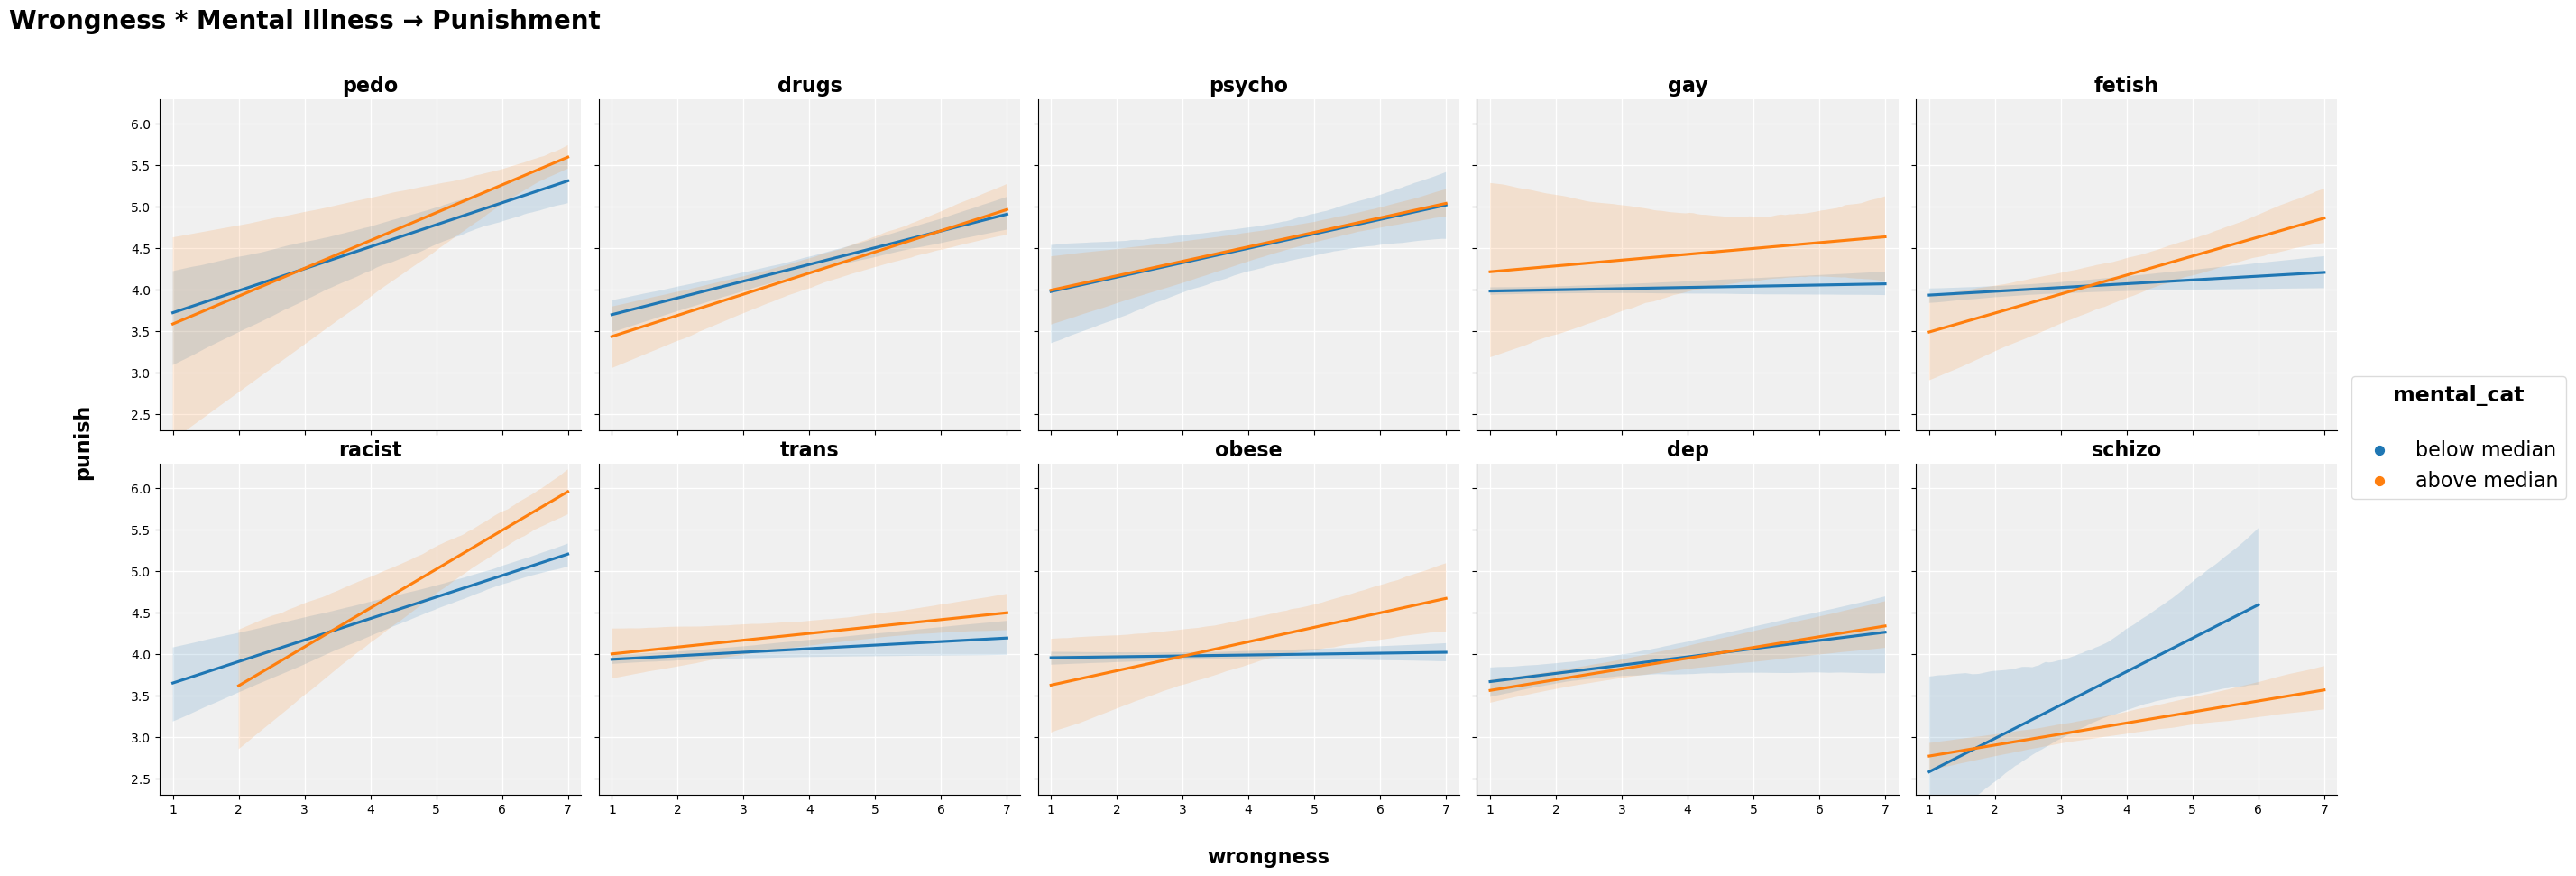

In [13]:
custom_titles = ['pedo', 'drugs', 'psycho', 'gay', 'fetish',
                 'racist', 'trans', 'obese', 'dep', 'schizo']

wm = sns.lmplot(
    data = MI_all, 
    x = 'wrong', y = 'punish', 
    col = 'Condition', hue = 'mental_med', col_wrap = 5,
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
wm.set(ylim = (2.3, 6.3), xlim = (0.8, 7.2), ylabel = "", xlabel = "")

wm.add_legend(legend_data = wm._legend_data, 
              title = 'mental_cat\n', # \n adds a space between title and elements
              prop = {'size': 16}, 
              edgecolor = 'lightgray',
              frameon = True, fancybox = True) # legend title
wm._legend.get_title().set_weight('bold') # bold title
wm._legend.get_title().set_size('17') # bold title

for lh in wm._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
for ax, title in zip(wm.axes.flat, custom_titles):
    ax.set_title(title, fontsize = 16, fontweight = "bold")

wm.fig.suptitle('Wrongness * Mental Illness → Punishment', x = 0.08, y = 0.93, size = 20, fontweight = "bold")
wm.fig.subplots_adjust(top = .83, hspace = 0.1)

wm.fig.text(0.47, -0.01, 'wrongness', ha='center', va='center', fontsize=16, fontweight='bold') # common x-label
wm.fig.text(-0.01, 0.45, 'punish', ha='center', va='center', fontsize=16, fontweight='bold', rotation='vertical') # common y-label

for ax in wm.axes.flat:
    ax.set_facecolor('#F0F0F0')  # set background color
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint horizontal gridlines
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')  # faint vertical gridlines
    ax.set_axisbelow(True)  # put gridlines below bar plots

plt.show(wm)

In [10]:
# save_directory = "/Users/merieldoyle/Desktop/ckMI/results/figures/moderations/"
# file_name = "mental-wrong-punish.png"
# save_path = save_directory + file_name

# mw.savefig(save_path, dpi=300)

### Across conditions

In [214]:
above_median_count = MI_all[MI_all['wrong_med'] == 'above median'].groupby('Condition')['wrong_med'].count()
above_median_count = above_median_count.sort_values(ascending=False)

top_5_conditions = above_median_count.head(5).index
bottom_5_conditions = above_median_count.tail(5).index

mean_df = MI_all.groupby('Condition')[['mental', 'wrong', 'punish']].mean().reset_index()

mean_df['wrong_med'] = mean_df['Condition'].apply(lambda x: 'above median' if x in top_5_conditions else 'below median')

mean_df

,Condition,mental,wrong,punish,wrong_med
0,dep,4.563410,2.831601,3.821206,below median
1,drugs,3.674274,4.852697,4.454357,above median
2,fetish,3.250696,3.462396,4.130919,below median
3,gay,1.859213,2.356108,4.045549,below median
4,obese,2.165884,3.809077,4.018779,above median
5,pedo,5.618257,6.603734,5.408714,above median
6,psycho,5.877847,5.565217,4.784679,above median
7,racist,2.578189,6.236626,5.115226,above median
8,schizo,6.363825,3.343035,3.118503,below median
9,trans,2.951172,2.894531,4.078125,below median


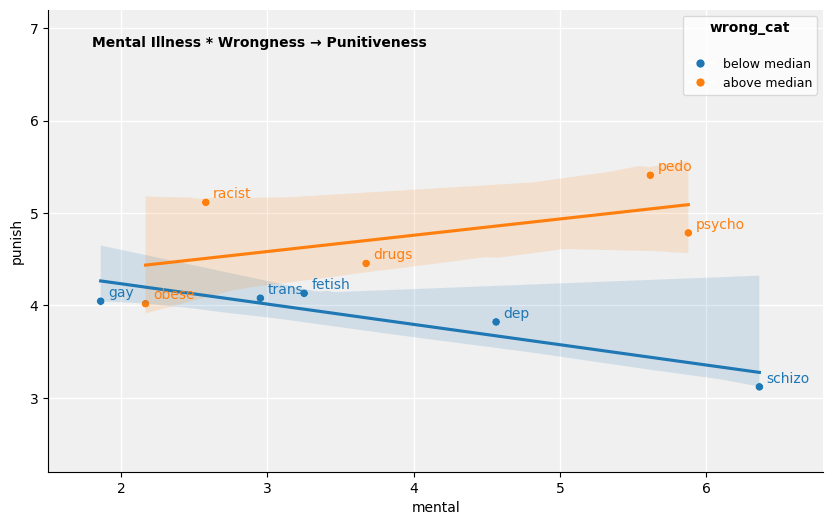

In [215]:
color_dict = {'below median': '#1f77b4', 'above median': '#ff7f0e'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label='below median',
                          markerfacecolor='#1f77b4', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='above median',
                          markerfacecolor='#ff7f0e', markersize=7)]

plt.figure(figsize=(10, 6))

mw_all = sns.scatterplot(
    data=mean_df,
    x='mental',
    y='punish',
    hue='wrong_med',
    alpha=1
)

mw_all.axes.set_facecolor('#F0F0F0')
mw_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
mw_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
mw_all.axes.set_axisbelow(True)

mw_all.spines['top'].set_visible(False)
mw_all.spines['right'].set_visible(False)

hue_categories = mean_df['wrong_med'].unique()

for hue_category in hue_categories:
    data_subset = mean_df[mean_df['wrong_med'] == hue_category]
    sns.regplot(
        data=data_subset,
        x='mental',
        y='punish',
        scatter=False
    )
    
for index, row in mean_df.iterrows():
    plt.text(
        row['mental'] + 0.05,
        row['punish'] + 0.05,
        row['Condition'],
        color=color_dict[row['wrong_med']],
        fontsize=10,
    )

plt.xlim(1.5, 6.8)
plt.ylim(2.2, 7.2)

plt.text(1.8, 6.8, 'Mental Illness * Wrongness → Punitiveness', fontsize=10, fontweight = "bold")

legend = plt.legend(handles=legend_elements, 
                    title='wrong_cat\n', title_fontsize=10, 
                    edgecolor='lightgray', prop = {'size': 9}, 
                    fancybox=True)

legend.get_title().set_weight('bold')

save_directory = "/Users/merieldoyle/Desktop/ckMI/results/figures/moderations/"
file_name = "mental-wrong-punish-ALL.png"
save_path = save_directory + file_name

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()

## Control * Wrongness → Punishment

In [216]:
cw_model = smf.ols(formula = 'punish ~ control + wrong', data = MI_all).fit()
cw_summary = cw_model.summary()
print(cw_summary.tables[0], cw_summary.tables[1])

model_interaction = smf.ols(formula = 'punish ~ control + wrong + control:wrong', data = MI_all).fit()
summary = model_interaction.summary()
print(summary.tables[0], summary.tables[1])

                            OLS Regression Results                            
Dep. Variable:                 punish   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.200
Method:                 Least Squares   F-statistic:                     612.8
Date:                Sat, 20 May 2023   Prob (F-statistic):          3.46e-238
Time:                        13:50:11   Log-Likelihood:                -7315.3
No. Observations:                4888   AIC:                         1.464e+04
Df Residuals:                    4885   BIC:                         1.466e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================== ==============================================================================
                 coef    std err          t      P>|

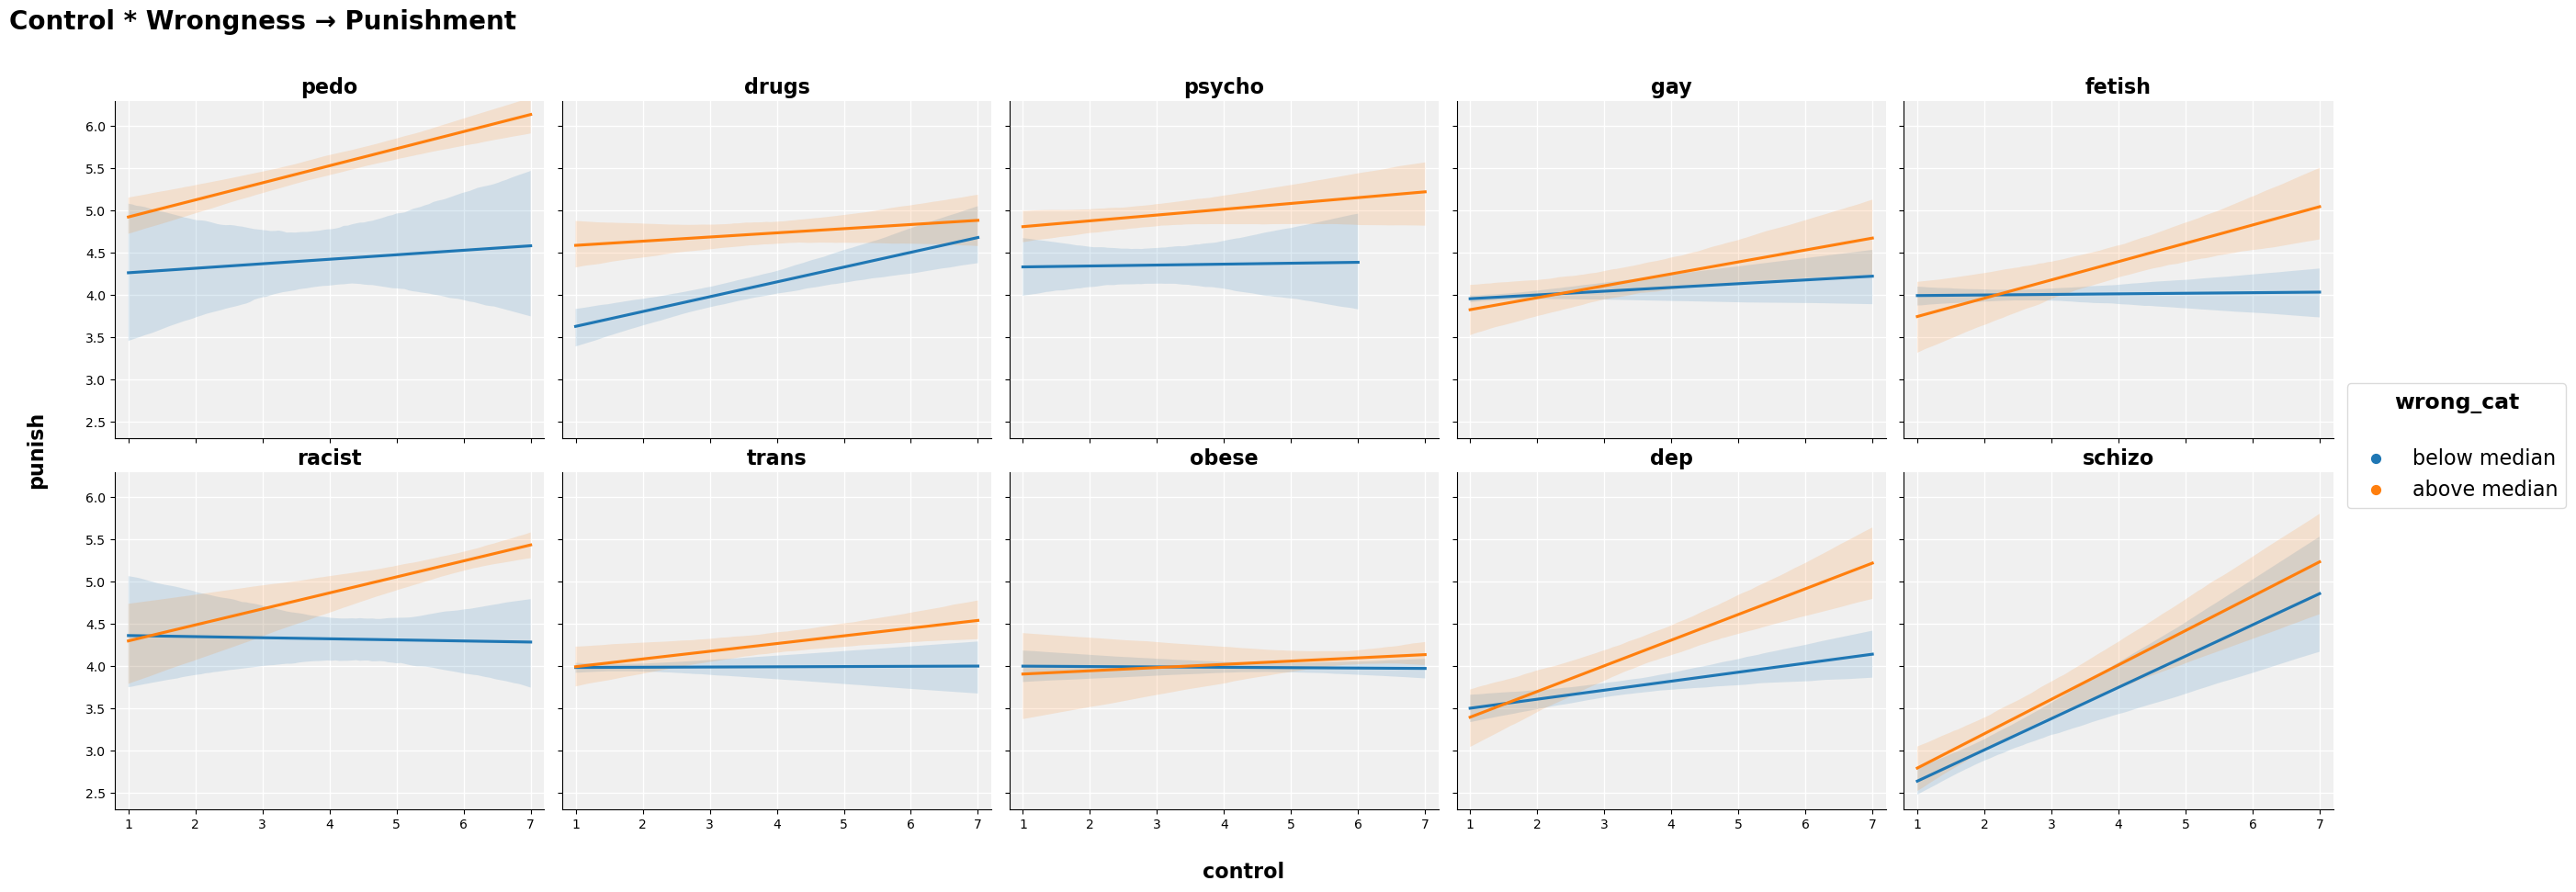

In [217]:
custom_titles = ['pedo', 'drugs', 'psycho', 'gay', 'fetish',
                 'racist', 'trans', 'obese', 'dep', 'schizo']

cw = sns.lmplot(
    data = MI_all, 
    x = 'control', y = 'punish', 
    col = 'Condition', hue = 'wrong_med', col_wrap = 5,
    markers = 'o', legend = False,
    scatter_kws = {'alpha': 0.000001})
cw.set(ylim = (2.3, 6.3), xlim = (0.8, 7.2), ylabel = "", xlabel = "")

cw.add_legend(legend_data = cw._legend_data, 
              title = 'wrong_cat\n', 
              prop = {'size': 16}, 
              edgecolor = 'lightgray',
              frameon = True, fancybox = True)
cw._legend.get_title().set_weight('bold')
cw._legend.get_title().set_size('17')

for lh in cw._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [50] 
    
for ax, title in zip(cw.axes.flat, custom_titles):
    ax.set_title(title, fontsize = 16, fontweight = "bold")

cw.fig.suptitle('Control * Wrongness → Punishment', x = 0.08, y = 0.93, size = 20, fontweight = "bold")
cw.fig.subplots_adjust(top = .83, hspace = 0.1)

cw.fig.text(0.47, -0.01, 'control', ha='center', va='center', fontsize=16, fontweight='bold') # common x-label
cw.fig.text(-0.01, 0.45, 'punish', ha='center', va='center', fontsize=16, fontweight='bold', rotation='vertical') # common y-label

for ax in cw.axes.flat:
    ax.set_facecolor('#F0F0F0')
    ax.yaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
    ax.xaxis.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
    ax.set_axisbelow(True)

plt.show(cw)

In [153]:
# save_directory = "/Users/merieldoyle/Desktop/ckMI/results/figures/moderations/"
# file_name = "control-wrong-punish.png"
# save_path = save_directory + file_name

# cw.savefig(save_path, dpi=300)

In [218]:
mean_df = MI_all.groupby('Condition')[['mental', 'wrong', 'punish', 'control']].mean().reset_index()

mean_df['wrong_med'] = mean_df['Condition'].apply(lambda x: 'above median' if x in top_5_conditions else 'below median')

mean_df

,Condition,mental,wrong,punish,control,wrong_med
0,dep,4.563410,2.831601,3.821206,3.093555,below median
1,drugs,3.674274,4.852697,4.454357,3.601660,above median
2,fetish,3.250696,3.462396,4.130919,3.401114,below median
3,gay,1.859213,2.356108,4.045549,2.360248,below median
4,obese,2.165884,3.809077,4.018779,5.021909,above median
5,pedo,5.618257,6.603734,5.408714,3.732365,above median
6,psycho,5.877847,5.565217,4.784679,2.635611,above median
7,racist,2.578189,6.236626,5.115226,5.718107,above median
8,schizo,6.363825,3.343035,3.118503,2.122661,below median
9,trans,2.951172,2.894531,4.078125,3.039062,below median


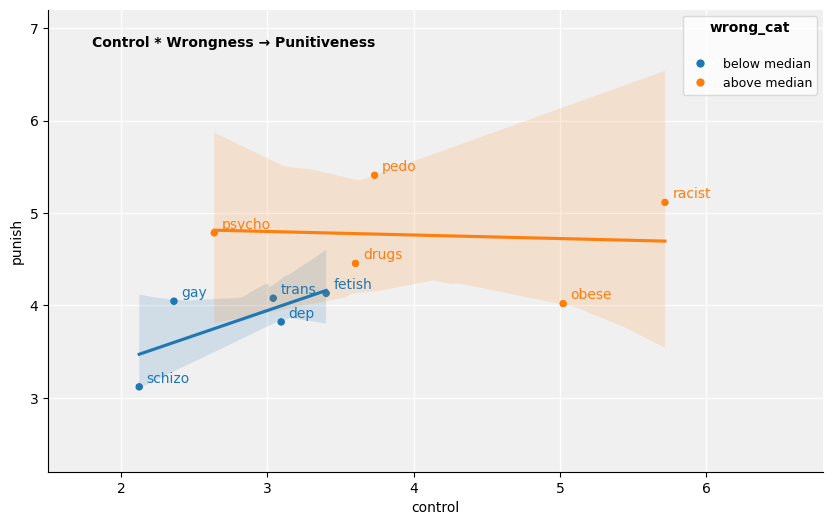

In [219]:
color_dict = {'below median': '#1f77b4', 'above median': '#ff7f0e'}

legend_elements = [Line2D([0], [0], marker='o', color='w', label='below median',
                          markerfacecolor='#1f77b4', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='above median',
                          markerfacecolor='#ff7f0e', markersize=7)]

plt.figure(figsize=(10, 6))

cw_all = sns.scatterplot(
    data=mean_df,
    x='control',
    y='punish',
    hue='wrong_med',
    alpha=1
)

cw_all.axes.set_facecolor('#F0F0F0')
cw_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
cw_all.axes.grid(True, linestyle='-', linewidth=1, alpha=1, color = 'white')
cw_all.axes.set_axisbelow(True)

cw_all.spines['top'].set_visible(False)
cw_all.spines['right'].set_visible(False)

hue_categories = mean_df['wrong_med'].unique()

for hue_category in hue_categories:
    data_subset = mean_df[mean_df['wrong_med'] == hue_category]
    sns.regplot(
        data=data_subset,
        x='control',
        y='punish',
        scatter=False
    )
    
for index, row in mean_df.iterrows():
    plt.text(
        row['control'] + 0.05,
        row['punish'] + 0.05,
        row['Condition'],
        color=color_dict[row['wrong_med']],
        fontsize=10,
    )

plt.xlim(1.5, 6.8)
plt.ylim(2.2, 7.2)

plt.text(1.8, 6.8, 'Control * Wrongness → Punitiveness', fontsize=10, fontweight = "bold")

legend = plt.legend(handles=legend_elements, 
                    title='wrong_cat\n', title_fontsize=10, 
                    edgecolor='lightgray', prop = {'size': 9}, 
                    fancybox=True)

legend.get_title().set_weight('bold')

save_directory = "/Users/merieldoyle/Desktop/ckMI/results/figures/moderations/"
file_name = "control-wrong-punish-ALL.png"
save_path = save_directory + file_name

plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()